In [2]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [4]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data1/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
print(labels[1])

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor(7)


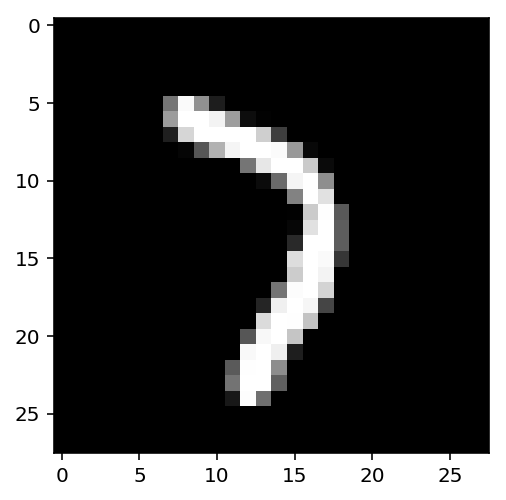

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [7]:
n_output=10
#flattening the images to get the input tensor of 784
n_input=images.view(images.shape[0],-1)
n_hidden=512
def activation(x):
    return (1/(1+torch.exp(-x)))

#two layers
W1=torch.randn(784,n_hidden)
W2=torch.randn(n_hidden,n_output)
#biases
B1=torch.randn((1,n_hidden))
B2=torch.randn((1,n_output))

h=activation(torch.matmul(n_input,W1)+B1)

out =torch.matmul(h,W2)+B2


In [9]:
n_input.shape

torch.Size([64, 784])

In [7]:
#To find out the probability between 0 & 1 and sum upto 1
def softmax(x):
    ## TODO: Implement the softmax function here
    return torch.exp(x)/(torch.sum(torch.exp(x),dim=1)).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)
print(probabilities)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))


tensor([[4.3945e-10, 1.1128e-12, 2.9283e-07, 5.3524e-14, 1.0000e+00, 1.7809e-29,
         2.4365e-23, 4.0877e-14, 1.1260e-16, 1.2096e-12],
        [2.8286e-03, 5.5886e-07, 6.1043e-03, 5.3997e-14, 1.1949e-04, 2.0793e-22,
         7.5694e-10, 9.9093e-01, 1.2114e-13, 1.7386e-05],
        [5.4388e-01, 2.1039e-04, 1.5460e-05, 1.4642e-09, 4.1350e-01, 1.3101e-21,
         7.3581e-08, 2.4041e-03, 6.3228e-17, 3.9995e-02],
        [7.5910e-02, 9.0721e-05, 1.0006e-08, 1.6649e-11, 9.2400e-01, 3.0615e-28,
         1.3107e-15, 7.5035e-11, 4.7240e-15, 1.5727e-09],
        [3.2703e-04, 1.6049e-06, 9.9960e-01, 1.5024e-13, 9.1705e-06, 1.0594e-24,
         2.2102e-16, 3.5843e-05, 1.4418e-16, 2.3432e-05],
        [3.0912e-06, 1.4699e-05, 1.3395e-01, 3.3452e-09, 8.6603e-01, 2.0926e-23,
         6.4778e-13, 4.6269e-08, 6.5442e-15, 1.2886e-06],
        [5.2214e-01, 1.0626e-06, 3.6613e-01, 2.2211e-09, 4.3529e-02, 5.1125e-21,
         3.7576e-06, 7.2719e-07, 1.6767e-12, 6.8200e-02],
        [1.0000e+00, 6.0594

## Building Networks with Pytorch using nn

In [8]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2=nn.Linear(256,64)
        # Output layer, 10 units - one for each digit
        
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [9]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

## Or can be done using

In [10]:
## Your solution here
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #self.input=nn.Linear(784,512)
        self.hidden1=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,64)
        self.output=nn.Linear(64,10)
        #self.loss_layer=nn.CrossEntropyLoss()
    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=F.softmax(self.output(x))
        #x=F.cross_entropy()
        return x
model=Network()
model
        

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

## Training Our MNIST DATASET

In [11]:
import torch
from torch import optim
from torchvision import datasets, transforms
from torch import nn

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data1/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
#Training
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output=model.forward(images)
        loss =criterion(output,labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8779554844919297
Training loss: 0.7971390607451071
Training loss: 0.5004121475636578
Training loss: 0.4183688098306595
Training loss: 0.3802822486265128


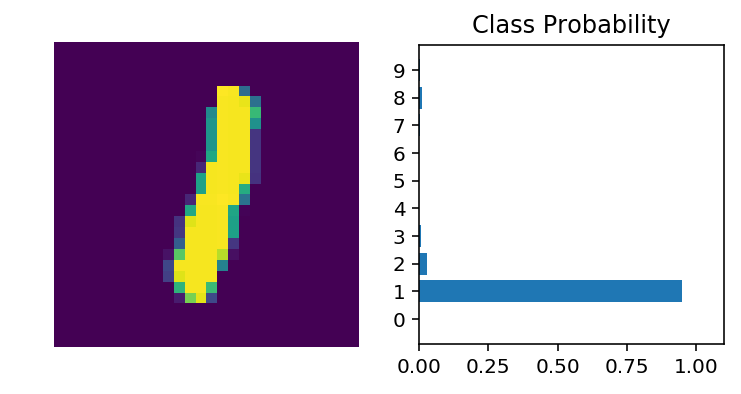

In [13]:
import torch.nn.functional as F
#Testing the model
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)